## Miniproject II, Guess the year !

### Import the Required Libraries

In [87]:
import pandas as pd
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt


# 10-5-3 relu

### Using pandas, load the .csv file.

In [88]:
data = pd.read_csv("YearPredictionMSD.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


### Verify whether any qualitative data is present in the dataset.

In [89]:
cols = data.columns
num_cols = data._get_numeric_data().columns
categorical=list(set(cols) - set(num_cols))
print(categorical)

[]


### Check for missing values. 

In [90]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
86    0
87    0
88    0
89    0
90    0
Length: 91, dtype: int64

### Check for outliers.

In [91]:
outliers = {}
for i in range(data.shape[1]):
    min_t = data[data.columns[i]].mean()- (3 * data[data.columns[i]].std())
    max_t = data[data.columns[i]].mean()+ (3 * data[data.columns[i]].std())
    count = 0
    for j in data[data.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    percentage = count / data.shape[0]
    outliers[data.columns[i]] = "%.3f" % percentage
outliers

{'0': '0.019',
 '1': '0.010',
 '2': '0.011',
 '3': '0.011',
 '4': '0.015',
 '5': '0.008',
 '6': '0.010',
 '7': '0.010',
 '8': '0.010',
 '9': '0.011',
 '10': '0.005',
 '11': '0.010',
 '12': '0.010',
 '13': '0.015',
 '14': '0.017',
 '15': '0.016',
 '16': '0.016',
 '17': '0.014',
 '18': '0.016',
 '19': '0.013',
 '20': '0.016',
 '21': '0.015',
 '22': '0.013',
 '23': '0.015',
 '24': '0.013',
 '25': '0.018',
 '26': '0.017',
 '27': '0.017',
 '28': '0.018',
 '29': '0.017',
 '30': '0.016',
 '31': '0.015',
 '32': '0.017',
 '33': '0.016',
 '34': '0.015',
 '35': '0.016',
 '36': '0.017',
 '37': '0.017',
 '38': '0.016',
 '39': '0.015',
 '40': '0.017',
 '41': '0.017',
 '42': '0.015',
 '43': '0.014',
 '44': '0.016',
 '45': '0.015',
 '46': '0.017',
 '47': '0.017',
 '48': '0.017',
 '49': '0.015',
 '50': '0.016',
 '51': '0.015',
 '52': '0.015',
 '53': '0.015',
 '54': '0.016',
 '55': '0.018',
 '56': '0.017',
 '57': '0.016',
 '58': '0.013',
 '59': '0.016',
 '60': '0.016',
 '61': '0.015',
 '62': '0.016',
 '

### Separate features from target data

In [92]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]



### Data Rescaling

In [93]:
Y

0        2001
1        2001
2        2001
3        2001
4        2001
         ... 
49995    2007
49996    1995
49997    1993
49998    1997
49999    1993
Name: 0, Length: 50000, dtype: int64

In [94]:
X

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,37.95326,-42.21487,-44.82607,13.16217,-4.14757,1.77670,26.01563,-8.15179,0.64576,-7.17165,...,-48.85550,40.70784,261.37664,39.05488,-51.71451,-50.74973,-194.57119,24.52345,142.12481,2.82938
49996,47.27200,21.27700,38.28961,6.75869,-32.07674,-16.23414,-5.54575,-3.11409,14.45544,3.37386,...,1.70638,15.84149,-22.59767,50.20260,0.99702,-7.05684,166.20633,1.11063,96.00506,24.68109
49997,42.30121,-47.90029,17.42798,4.55742,-15.32791,-12.34641,0.41874,-0.38197,-6.08225,-2.33270,...,43.12004,54.85375,36.46792,85.34408,-13.65647,-169.26779,-63.18600,17.11098,71.99619,8.43229
49998,42.96844,18.25597,-5.75444,-5.31508,-13.50973,-1.95559,-6.13951,-8.72654,-2.06879,0.18314,...,14.06867,1.50211,4.69479,26.80340,-1.94514,95.63607,-206.06340,-0.66263,40.44356,14.10070


In [95]:
X = (X - X.min()) / (X.max() - X.min())
X.head()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
0,0.860844,0.520015,0.638629,0.468319,0.279845,0.267357,0.497138,0.325330,0.617330,0.340078,...,0.432239,0.569115,0.327585,0.493224,0.512380,0.659509,0.528092,0.499917,0.542475,0.459884
1,0.837937,0.514852,0.633315,0.483503,0.298094,0.202651,0.616818,0.410166,0.670349,0.414250,...,0.424980,0.577781,0.321123,0.502724,0.484122,0.656912,0.528448,0.529855,0.551845,0.495266
2,0.880010,0.537641,0.605290,0.485205,0.307745,0.237314,0.574141,0.399441,0.657280,0.380663,...,0.422381,0.589197,0.300206,0.491692,0.509335,0.678347,0.496790,0.503723,0.549798,0.455684
3,0.828773,0.480350,0.567581,0.446035,0.327202,0.195050,0.603655,0.339514,0.596574,0.299154,...,0.453535,0.539840,0.308665,0.471793,0.477423,0.689537,0.504114,0.525228,0.567246,0.483691
4,0.880257,0.555214,0.627082,0.467304,0.283848,0.246879,0.541533,0.346750,0.640634,0.375840,...,0.429187,0.568728,0.329063,0.481793,0.505700,0.663939,0.525252,0.520872,0.551543,0.497890


### Splitting the Dataset

In [96]:
X.shape

train_end = int(len(X) * 0.8)
dev_end = int(len(X) * 0.9)

X_shuffle = X.sample(frac=1, random_state=0)
Y_shuffle = Y.sample(frac=1, random_state=0)

x_train = X_shuffle.iloc[:train_end,:]
y_train = Y_shuffle.iloc[:train_end]
x_dev = X_shuffle.iloc[train_end:dev_end,:]
y_dev = Y_shuffle.iloc[train_end:dev_end]
x_test = X_shuffle.iloc[dev_end:,:]
y_test = Y_shuffle.iloc[dev_end:]

print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

(40000, 90) (40000,)
(5000, 90) (5000,)
(5000, 90) (5000,)


### Part 2: Create and Train the model

### import relevant modules

In [97]:
import pandas as pd
import torch as t
import torch.nn as nn

### Convert the DataFrames into tensors. 

In [98]:
x_train = t.tensor(x_train.values).float()
y_train = t.tensor(y_train.values).float()
x_dev = t.tensor(x_dev.values).float()
y_dev = t.tensor(y_dev.values).float()
x_test = t.tensor(x_test.values).float()
y_test = t.tensor(y_test.values).float()

### Define the architecture of the network. 

In [99]:
x_train.shape[1]

90

In [100]:
# 10-5-3 relu
model = nn.Sequential(nn.Linear(x_train.shape[1], 50), \
nn.ReLU(), \
nn.Linear(50, 25), \
nn.ReLU(), \
nn.Linear(25, 5), \
nn.ReLU(), \
nn.Linear(5, 1))

### Define loss and optimizer

In [101]:
loss_function = t.nn.MSELoss()

In [102]:
optimizer = t.optim.Adam(model.parameters(), lr=0.1) 

### train the network

In [103]:
model = nn.Sequential(nn.Linear(x_train.shape[1], 10), \
nn.ReLU(), \
nn.Linear(10, 5), \
nn.ReLU(), \
nn.Linear(5, 3), \
nn.ReLU(), \
nn.Linear(3, 1))
loss_function = t.nn.MSELoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.145) 

EPOCHS=3000

loss_hist = []
for i in range(EPOCHS+1):
    y_pred = model(x_train).squeeze()
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        # print(i, loss.item())
        loss_hist.append(loss.item()/x_train.shape[0])
        print(i, loss.item()/x_train.shape[0])
        
pred = model(x_test[0])
print("Ground truth:", y_test[0].item(), "Prediction:",int(pred.item()))

0 99.87366875
100 0.021049070739746094
200 0.013156776428222655
300 0.011007538604736328
400 0.010123564910888672
500 0.009593970489501953
600 0.00915057373046875
700 0.008750653839111328
800 0.008391596221923828
900 0.008072474670410156
1000 0.007790280914306641
1100 0.0075406494140625
1200 0.007318763732910156
1300 0.007120006561279297
1400 0.006940283203125
1500 0.00677623519897461
1600 0.006625215911865235
1700 0.006485202026367188
1800 0.0063546642303466796
1900 0.006232432556152343
2000 0.00611758918762207
2100 0.006009370803833008
2200 0.00590714111328125
2300 0.005810351181030273
2400 0.005718511199951172
2500 0.005631208801269531
2600 0.005548091125488281
2700 0.0054688468933105465
2800 0.005393228149414063
2900 0.023528274536132814
3000 0.005282250595092773
Ground truth: 2005.0 Prediction: 2008


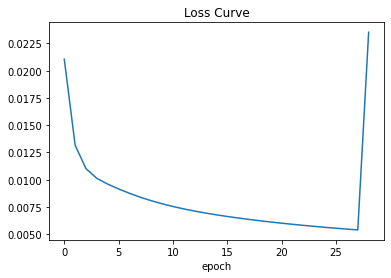

In [104]:
plt.plot(loss_hist[1:-1],'-')
plt.title('Loss Curve')
plt.xlabel('epoch')
plt.show()

In [105]:
diff = 0
prediction = []
GT = []
for i in range(x_test.shape[0]):
    pred = model(x_test[i])
    prediction.append(int(pred.item()))
    GT.append(y_test[i].item())
    print("Ground truth:", y_test[i].item(), "Prediction:",int(pred.item()))
    diff += abs(y_test[i].item() - int(pred.item()))

print(f'avg diff: {diff/x_test.shape[0]}')


Ground truth: 2005.0 Prediction: 2008
Ground truth: 2005.0 Prediction: 1999
Ground truth: 2000.0 Prediction: 2006
Ground truth: 1971.0 Prediction: 1990
Ground truth: 2007.0 Prediction: 1998
Ground truth: 1996.0 Prediction: 1990
Ground truth: 2004.0 Prediction: 2003
Ground truth: 2000.0 Prediction: 1987
Ground truth: 2004.0 Prediction: 1995
Ground truth: 2009.0 Prediction: 2001
Ground truth: 2008.0 Prediction: 2002
Ground truth: 1997.0 Prediction: 1997
Ground truth: 2006.0 Prediction: 2014
Ground truth: 2004.0 Prediction: 2006
Ground truth: 2007.0 Prediction: 2003
Ground truth: 2009.0 Prediction: 2010
Ground truth: 2000.0 Prediction: 1982
Ground truth: 1999.0 Prediction: 1999
Ground truth: 2003.0 Prediction: 2006
Ground truth: 2008.0 Prediction: 2005
Ground truth: 2006.0 Prediction: 2000
Ground truth: 2000.0 Prediction: 2003
Ground truth: 1997.0 Prediction: 2014
Ground truth: 2004.0 Prediction: 1988
Ground truth: 1979.0 Prediction: 1995
Ground truth: 2008.0 Prediction: 2004
Ground truth

In [109]:
prediction

[2008,
 1999,
 2006,
 1990,
 1998,
 1990,
 2003,
 1987,
 1995,
 2001,
 2002,
 1997,
 2014,
 2006,
 2003,
 2010,
 1982,
 1999,
 2006,
 2005,
 2000,
 2003,
 2014,
 1988,
 1995,
 2004,
 2003,
 2002,
 2011,
 1985,
 2001,
 1995,
 1998,
 1981,
 2001,
 2014,
 1993,
 2003,
 2002,
 1989,
 1991,
 2012,
 1996,
 2001,
 1994,
 1999,
 1987,
 2001,
 1989,
 1990,
 1993,
 1994,
 2004,
 2001,
 2009,
 1971,
 2001,
 1992,
 1993,
 2006,
 2002,
 2001,
 1996,
 2011,
 1997,
 1997,
 1994,
 1990,
 1995,
 2001,
 1992,
 1987,
 2013,
 1996,
 1992,
 1996,
 2002,
 1986,
 1983,
 1992,
 1998,
 2001,
 1996,
 1993,
 2003,
 1995,
 1993,
 2008,
 1987,
 2005,
 2018,
 1983,
 1996,
 1998,
 1998,
 2002,
 2010,
 2013,
 1993,
 2007,
 1998,
 1990,
 2001,
 1985,
 1998,
 1985,
 2009,
 1991,
 1992,
 2005,
 1996,
 2006,
 1996,
 1982,
 2039,
 1989,
 1980,
 2000,
 1991,
 2003,
 1990,
 2006,
 1996,
 1993,
 1997,
 1998,
 1983,
 2031,
 1979,
 1998,
 1993,
 1992,
 1997,
 1994,
 2002,
 1996,
 2004,
 1981,
 2014,
 1986,
 1995,
 1994,
 1994,

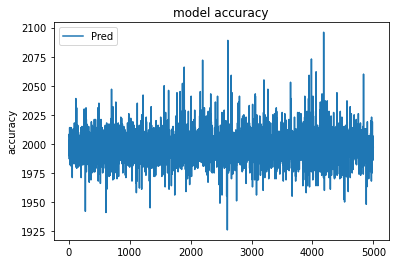

In [115]:
plt.plot(range(x_test.shape[0]),prediction,'-')
# plt.plot(range(x_test.shape[0]),GT,'-')
plt.title('model accuracy')
plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['Pred', 'GT'], loc='upper left')
plt.show()

### Test using the first register in the test dataset

In [107]:
pred = model(x_test[0])
print("Ground truth:", y_test[0].item(), "Prediction:",pred.item())

Ground truth: 2005.0 Prediction: 2008.275146484375
